In [51]:
pip install pandas matplotlib seaborn scatterplot

Note: you may need to restart the kernel to use updated packages.


# Imports

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Charger les données nettoyées
df = pd.read_csv('../data/processed/cleaned_data.csv')


# Data explo

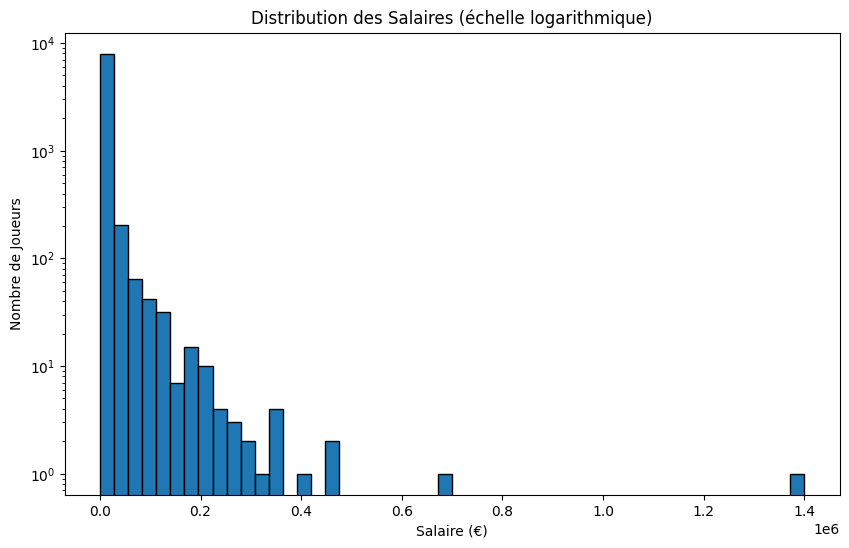

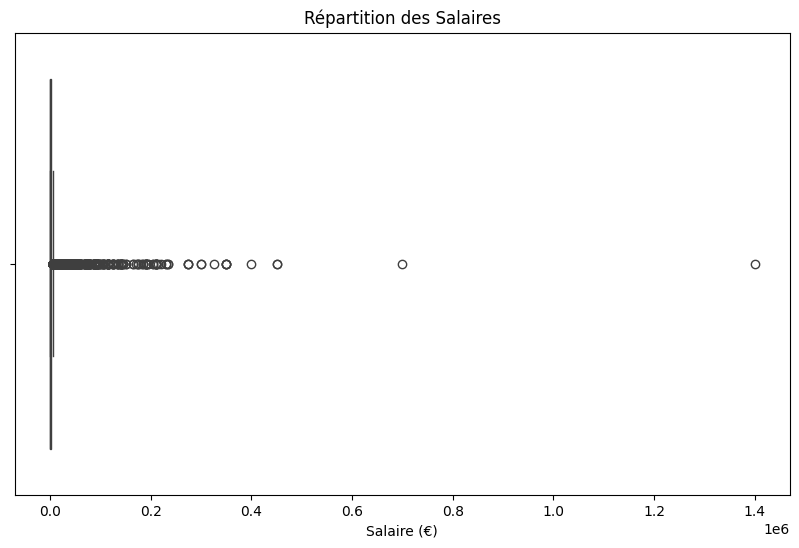

In [53]:
# Histogram with logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df['Wage'], bins=50, edgecolor='black', log=True)
plt.title('Distribution des Salaires (échelle logarithmique)')
plt.xlabel('Salaire (€)')
plt.ylabel('Nombre de Joueurs')
plt.show()

# Salaries boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Wage'])
plt.title('Répartition des Salaires')
plt.xlabel('Salaire (€)')
plt.show()


# Find the two biggest salaries and drop them

Top 2 Salaries: [1400000.0, 700000.0]


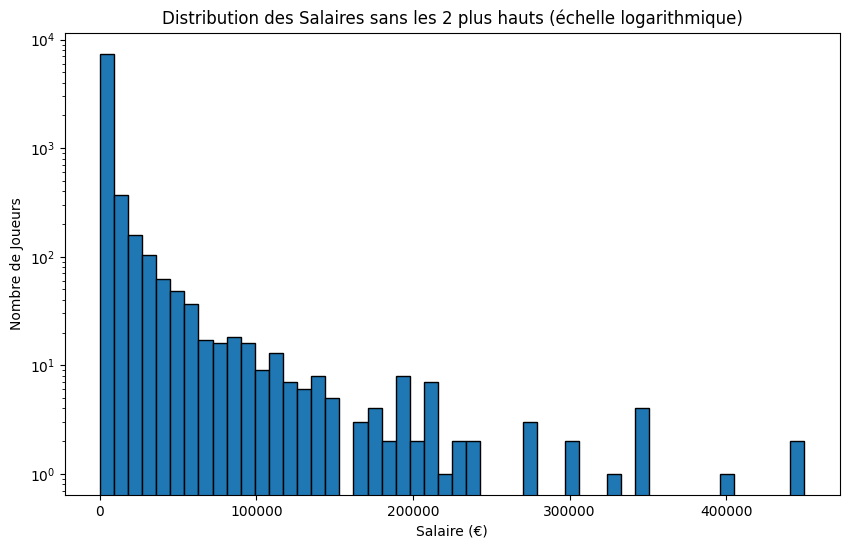

In [54]:
top_2_salaire = df['Wage'].nlargest(2)
print("Top 2 Salaries:", top_2_salaire.tolist())
df_filtered = df[~df['Wage'].isin(top_2_salaire)]
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Wage'], bins=50, edgecolor='black', log=True)
plt.title('Distribution des Salaires sans les 2 plus hauts (échelle logarithmique)')
plt.xlabel('Salaire (€)')
plt.ylabel('Nombre de Joueurs')
plt.show()


# Correlation between numeric statistics

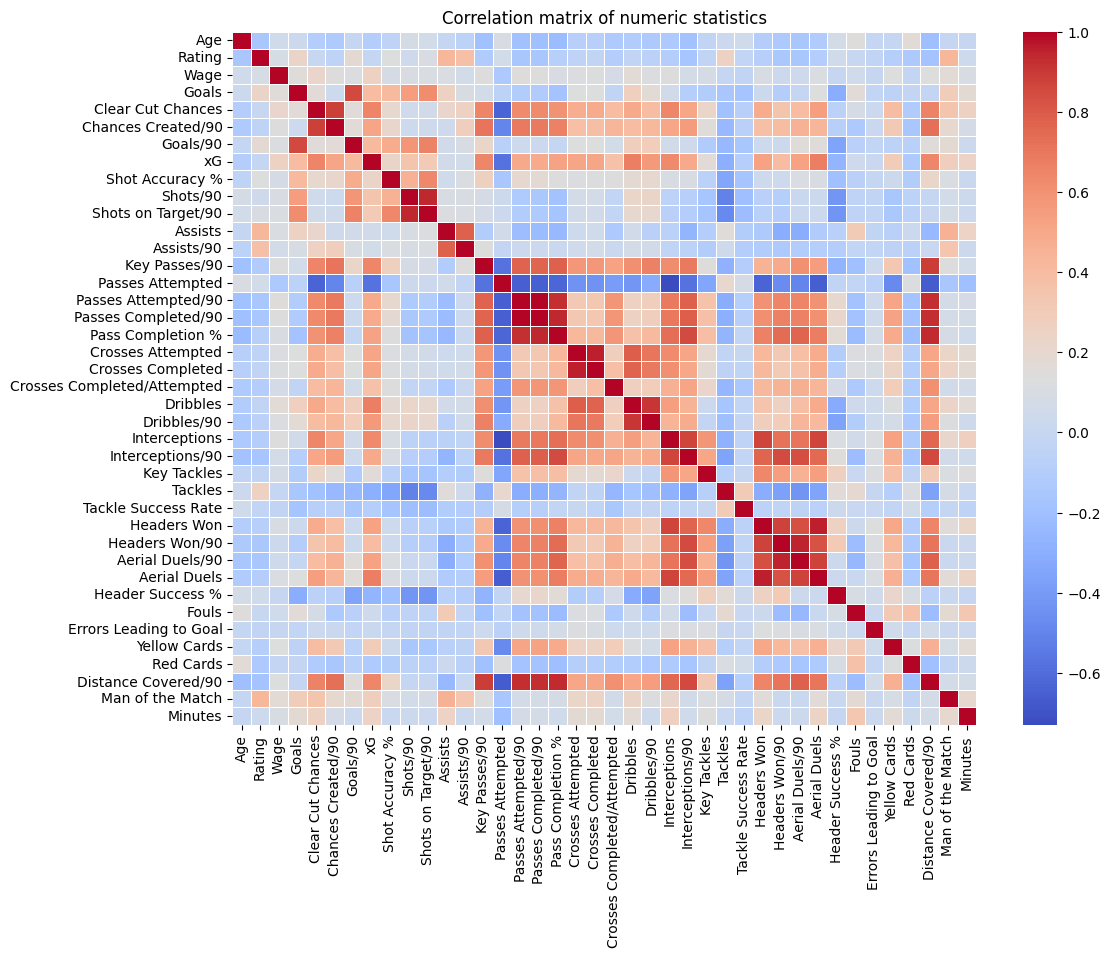

In [55]:

# Retrieve only numeric columns and drop 'ID'
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.drop('ID', axis=1)

# Correlation between numeric statistics
plt.figure(figsize=(12, 9))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation matrix of numeric statistics')
plt.show()


# Overperformers identification

                      Name                       Division  Goals  \
2696    Jort van der Sande        Keuken Kampioen Divisie     22   
2546            Jaze Kabia               cinch League One     20   
2971         Aaron Collins             Sky Bet League Two     20   
7332       Willie Faulkner     Bluefin Sport Championship     13   
1347         Denys Harmash                    FavBet Liha     12   
1032   Baptiste Santamaria              Ligue 1 Uber Eats     13   
1316   Maxim Plakushchenko  Ligat Tel Aviv Stock Exchange     12   
1296  Jakub Błaszczykowski                PKO Ekstraklasa     12   
1432         Alassane Ndao            Spor Toto Süper Lig     17   
6461        Daniel Sebesta                        2. Liga     16   
754          Yanis Rahmani               LaLiga SmartBank     14   
1027              Pep Biel                   3F Superliga     17   
6019         Tony Dingwall               cinch League Two     12   
1492         Bohdan Lednev                  OTP 

/tmp/ipykernel_1011/1512935776.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic, palette='viridis')
/tmp/ipykernel_1011/1512935776.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Position')


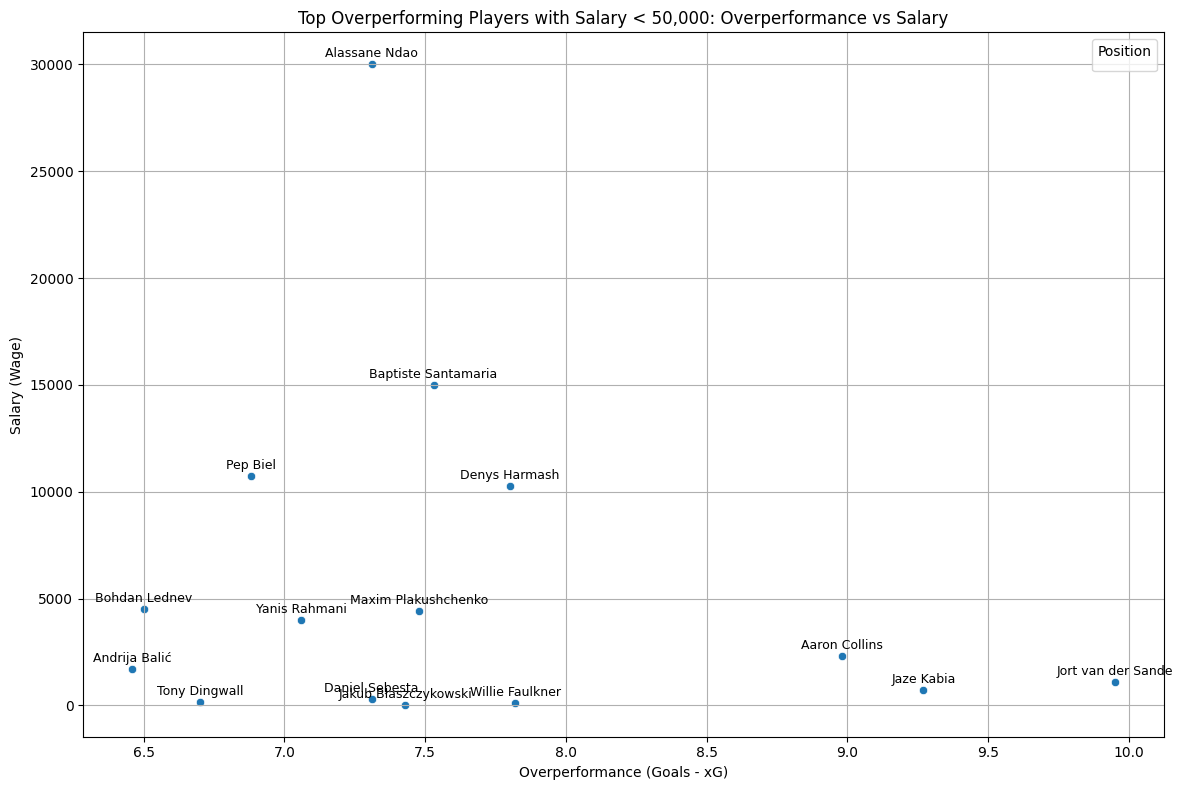

In [56]:
# Overperformance calculation
df_filtered_xG = df.copy()  
df_filtered_xG['Difference_Gls_xG'] = df_filtered_xG['Goals'] - df_filtered_xG['xG']

# Try to get more realistic
df_filtered_xG_realistic = df_filtered_xG[df_filtered_xG['Difference_Gls_xG'] <= 0.7 * df_filtered_xG['Goals']]

# Drop players with high salary
df_filtered_xG_realistic = df_filtered_xG_realistic[df_filtered_xG_realistic['Wage'] < 50000]

# Get the top 15 overperformers
df_filtered_xG_realistic['Overperf_Gls_xG'] = df_filtered_xG_realistic['Goals'] - df_filtered_xG_realistic['xG']
top_overperformers_realistic = df_filtered_xG_realistic.nlargest(15, 'Overperf_Gls_xG')
print(top_overperformers_realistic[['Name', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Display it with a graph
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic, palette='viridis')

for i in range(len(top_overperformers_realistic)):
    player_name = top_overperformers_realistic.iloc[i]['Name']
    overperformance = top_overperformers_realistic.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# More infos
plt.title('Top Overperforming Players with Salary < 50,000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluating u23 xG overperformances in the top 5 leagues 

/tmp/ipykernel_1011/3022382300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_leagues['Overperformance_Gls_xG'] = df_top_leagues['Goals'] - df_top_leagues['xG']
/tmp/ipykernel_1011/3022382300.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')


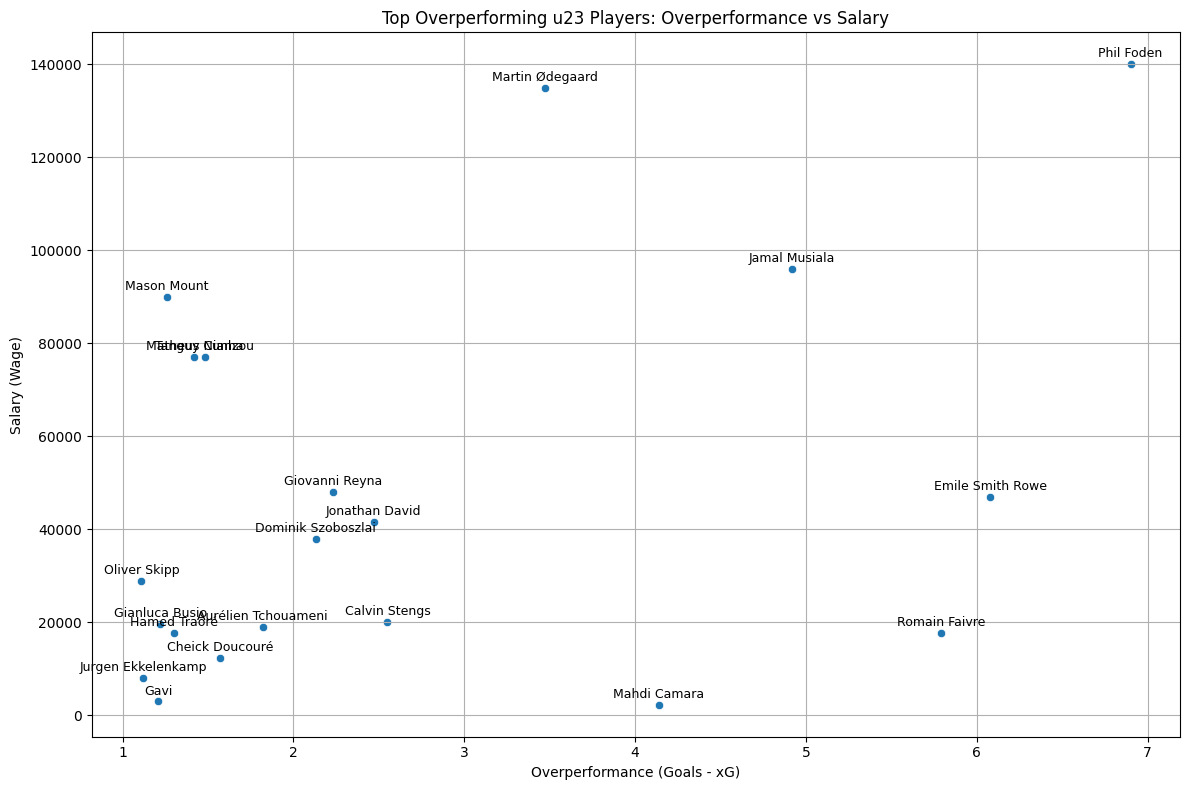

In [57]:
# Get the top 5 leagues players 
top_leagues = ["Ligue 1 Uber Eats", "Premier League", "Bundesliga", "Serie A TIM", "LaLiga Santander"]
df_top_leagues = df[df['Division'].isin(top_leagues)]

# xG overperformance calculation
df_top_leagues['Overperformance_Gls_xG'] = df_top_leagues['Goals'] - df_top_leagues['xG']

# Age filtration 
top_overperformers = df_top_leagues[df_top_leagues['Age'] <= 23]

# Select top 20
top_overperformers = top_overperformers.nlargest(20, 'Overperformance_Gls_xG') 


# Show it with a graph
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')

for i in range(len(top_overperformers)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title('Top Overperforming u23 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluating u20 overperformances in the top 5 leagues

/tmp/ipykernel_1011/2721499132.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers_20, palette='viridis')


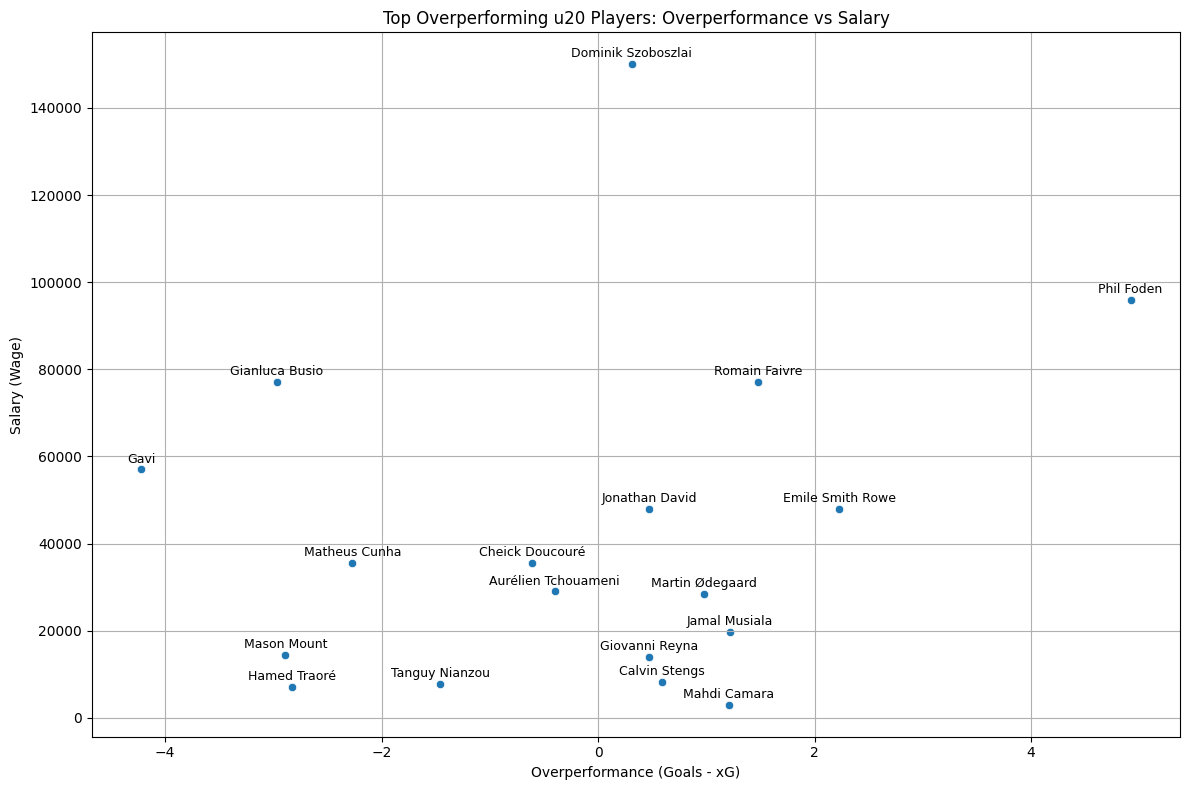

In [58]:

# Filter by age < 20
top_overperformers_20 = df_top_leagues[df_top_leagues['Age'] <= 20]
count = df_top_leagues['Age'].value_counts()

# Select the top 20 overperformers
top_overperformers_20 = top_overperformers_20.nlargest(20, 'Overperformance_Gls_xG') 


# Graph it
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers_20, palette='viridis')

for i in range(len(top_overperformers_20)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers_20.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers_20.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title('Top Overperforming u20 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluating u19 overperf in the top 5 leagues

/tmp/ipykernel_1011/2220064010.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')


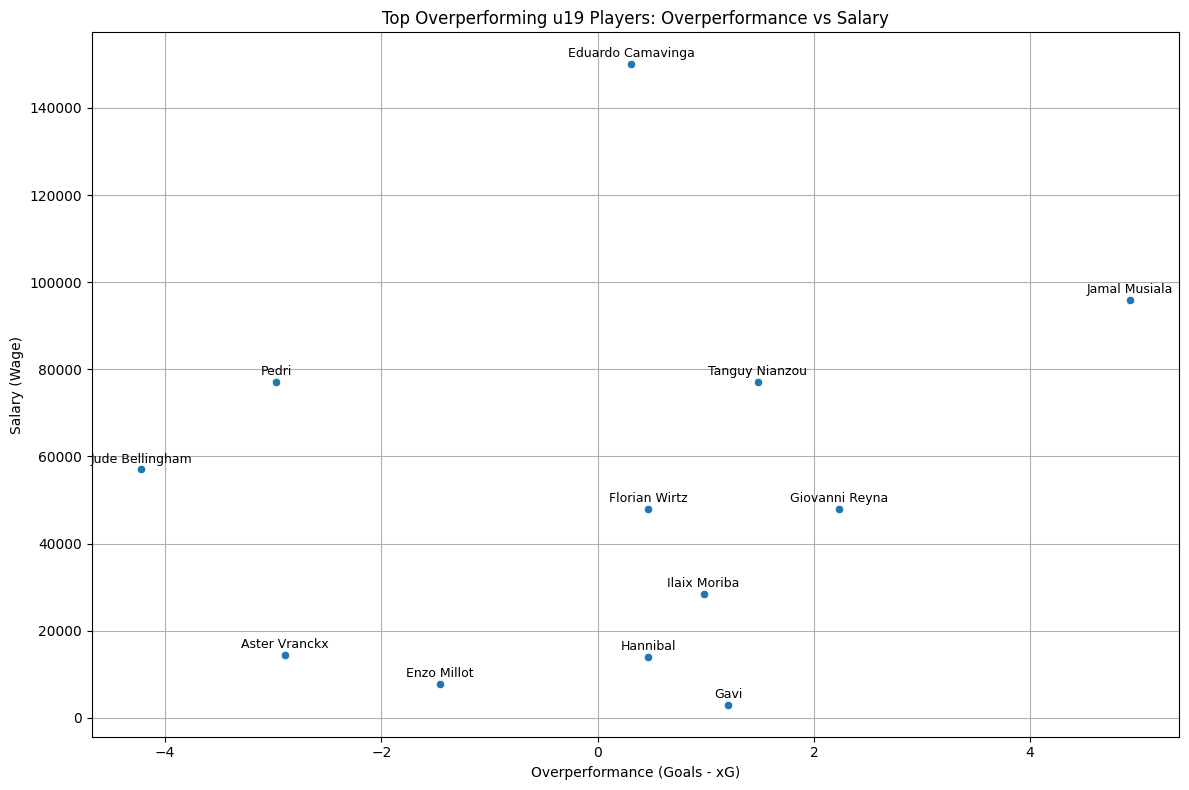

In [59]:
# Filter by age < 19
top_overperformers = df_top_leagues[df_top_leagues['Age'] <= 19]

# Select the top 20 overperformers
top_overperformers = top_overperformers.nlargest(20, 'Overperformance_Gls_xG') 


# Create the associate graph
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=top_overperformers, palette='viridis')

for i in range(len(top_overperformers)):
    player_name = top_overperformers.iloc[i]['Name']
    overperformance = top_overperformers.iloc[i]['Overperformance_Gls_xG']
    wage = top_overperformers.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title('Top Overperforming u19 Players: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluate top xG overperformers in tier 2 leagues

/tmp/ipykernel_1011/4134415371.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=df_other_leagues, palette='viridis')


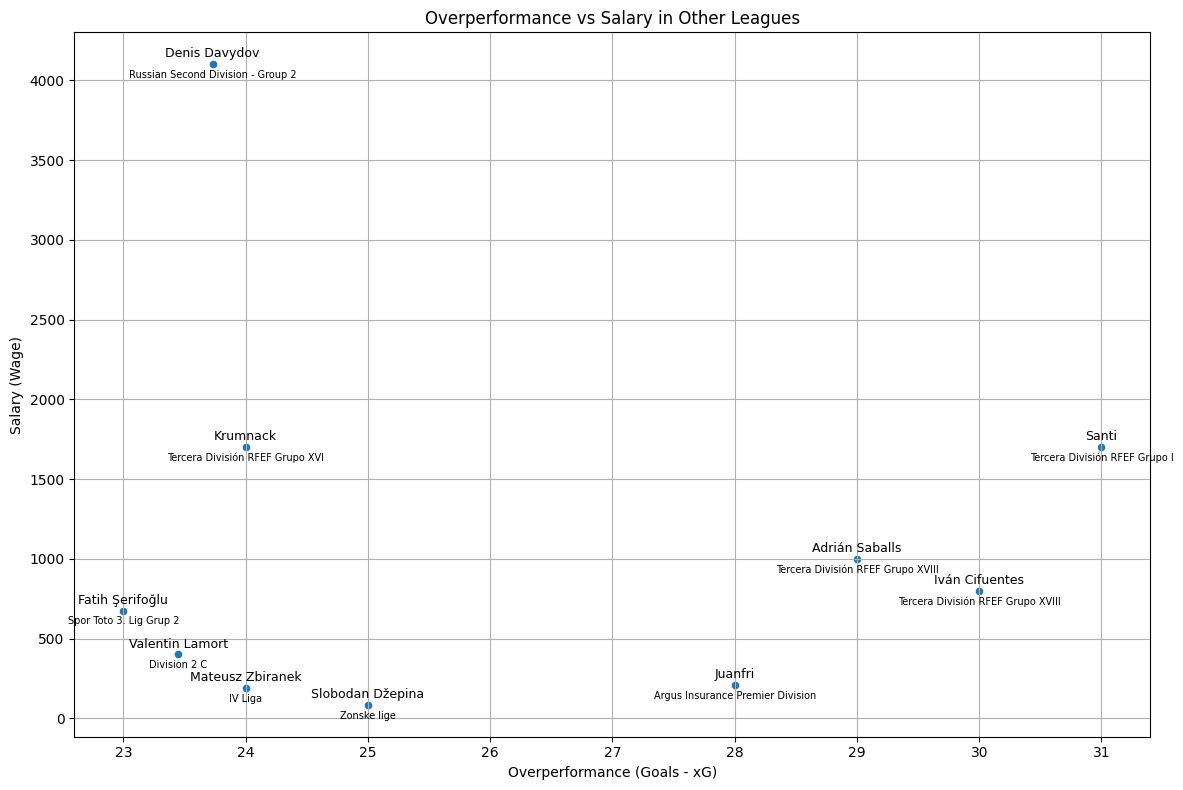

In [60]:
# Exclude top 5 leagues from the dataset
df_other_leagues = df[~df['Division'].isin(top_leagues)]
# Exclude null wage values
df_other_leagues = df_other_leagues[df_other_leagues['Wage'] > 0]
# Exclude 0 division values
df_other_leagues = df_other_leagues[df_other_leagues['Division'] != 0]
# Top overperformers in other leagues
df_other_leagues['Overperformance_Gls_xG'] = df_other_leagues['Goals'] - df_other_leagues['xG']
df_other_leagues = df_other_leagues.nlargest(10, 'Overperformance_Gls_xG')  

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=df_other_leagues, palette='viridis')
for i in range(len(df_other_leagues)):
    player_name = df_other_leagues.iloc[i]['Name']
    division = df_other_leagues.iloc[i]['Division']
    overperformance = df_other_leagues.iloc[i]['Overperformance_Gls_xG']
    wage = df_other_leagues.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )
    plt.annotate(
        division,
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,-10),
        ha='center',
        fontsize=7,
        color='black'
    )

plt.title('Overperformance vs Salary in Other Leagues')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()  

# Evaluate top u21 xG overperformers in tier 2 leagues

/tmp/ipykernel_1011/822093693.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=u21_players, palette='viridis')


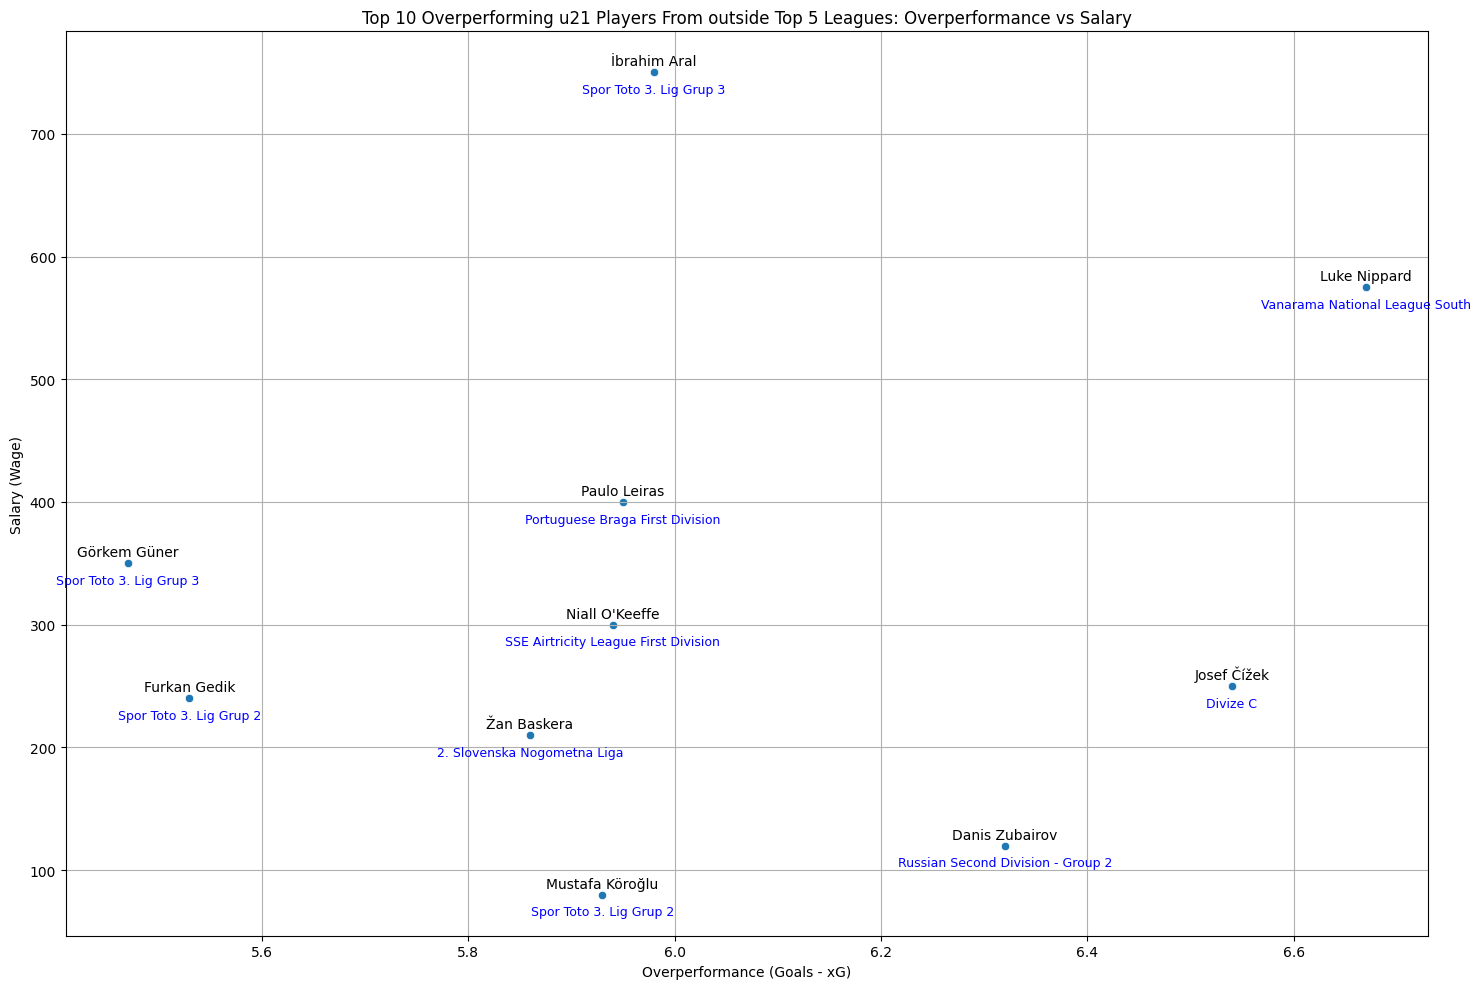

In [68]:
# Calculate median wage by Division
median_wage_by_division = df.groupby('Division')['Wage'].median()

# Filter divisions with more than 10 players
divisions_with_more_than_10_players = df['Division'].value_counts()
divisions_with_more_than_10_players = divisions_with_more_than_10_players[divisions_with_more_than_10_players >= 10].index
median_wage_by_division = median_wage_by_division[median_wage_by_division.index.isin(divisions_with_more_than_10_players)]

# Delete NaN values
median_wage_by_division = median_wage_by_division.dropna()

top_8_championships = median_wage_by_division.sort_values(ascending=False).head(8)
top_8_championships_list = top_8_championships.index.tolist()
players_outside_top_8 = df[~df['Division'].isin(top_8_championships_list)]

u21_players = players_outside_top_8[players_outside_top_8['Age'] <= 21]
# Exclude players with 0 xG
u21_players = u21_players[u21_players['xG'] > 0]
# Exclude players that can play as a striker
u21_players = u21_players[~u21_players['Position'].str.contains('ST')]
# Exclude players with wage higher than 5000 
u21_players = u21_players[u21_players['Wage'] <= 5000]

u21_players = u21_players[['Name', 'Age', 'Club', 'Goals', 'xG', 'Wage', 'Nationality', 'Division', 'Rating']]
u21_players['Overperformance_Gls_xG'] = u21_players['Goals'] - u21_players['xG']

u21_players = u21_players.nlargest(10, 'Overperformance_Gls_xG') 


# Create graph
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Overperformance_Gls_xG', y='Wage', data=u21_players, palette='viridis')

for i in range(len(u21_players)):
    player_name = u21_players.iloc[i]['Name']
    overperformance = u21_players.iloc[i]['Overperformance_Gls_xG']
    wage = u21_players.iloc[i]['Wage']
    league = u21_players.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )
    plt.annotate(
        league, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=9,
        color='blue'
    )

# Personnaliser le graphique
plt.title('Top 10 Overperforming u21 Players From outside Top 5 Leagues: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparing Top Performing U21 Midfielders: Top 8 Leagues vs. Outside Top 8 Leagues (Under 10k wage)

/tmp/ipykernel_1011/1661310701.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance', y='Wage', data=top_performers_top_8, palette='viridis')


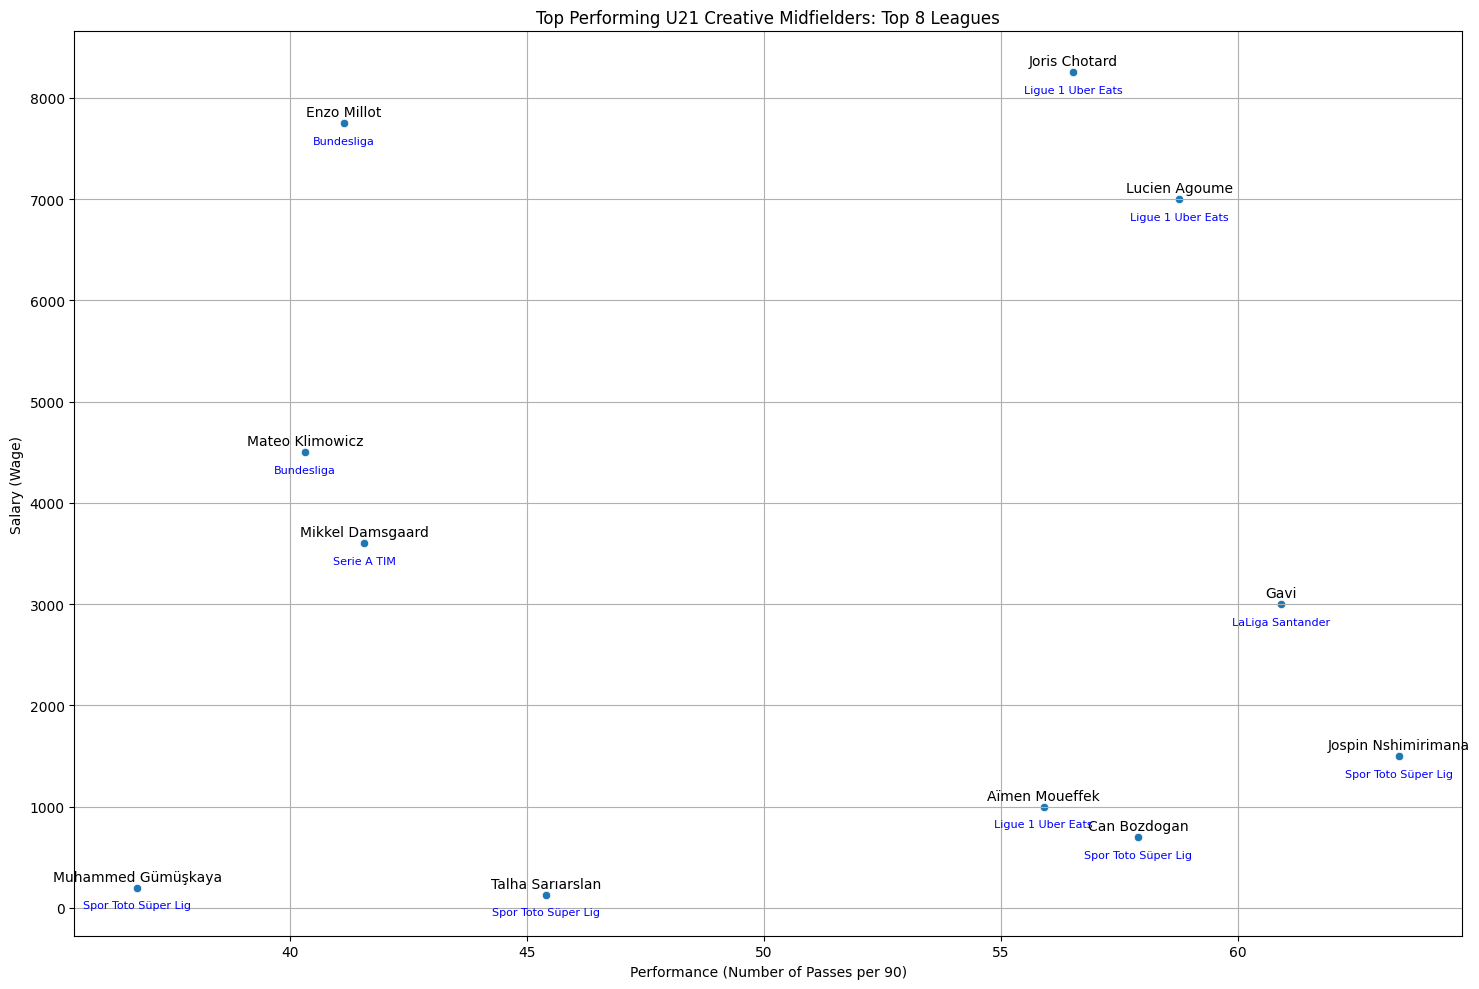

/tmp/ipykernel_1011/1661310701.py:80: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')
/tmp/ipykernel_1011/1661310701.py:116: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')


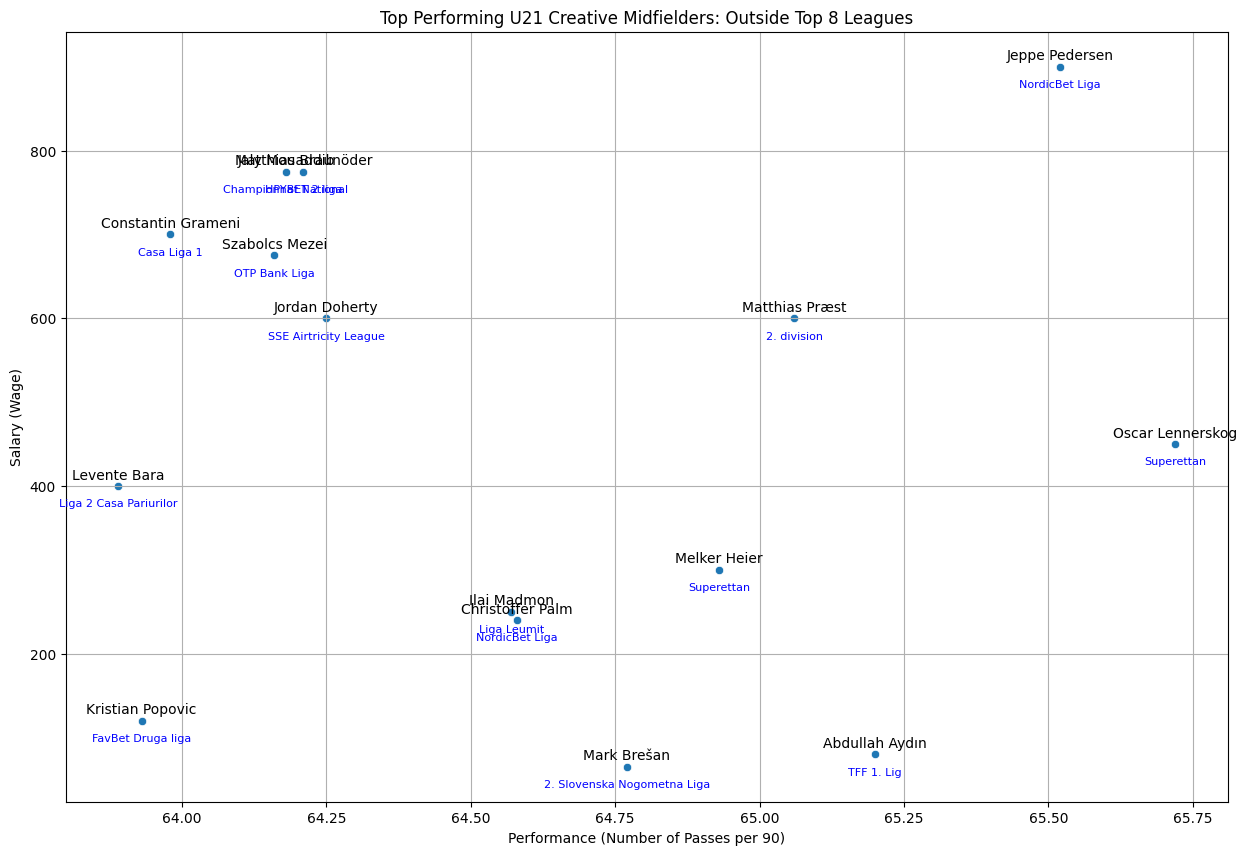

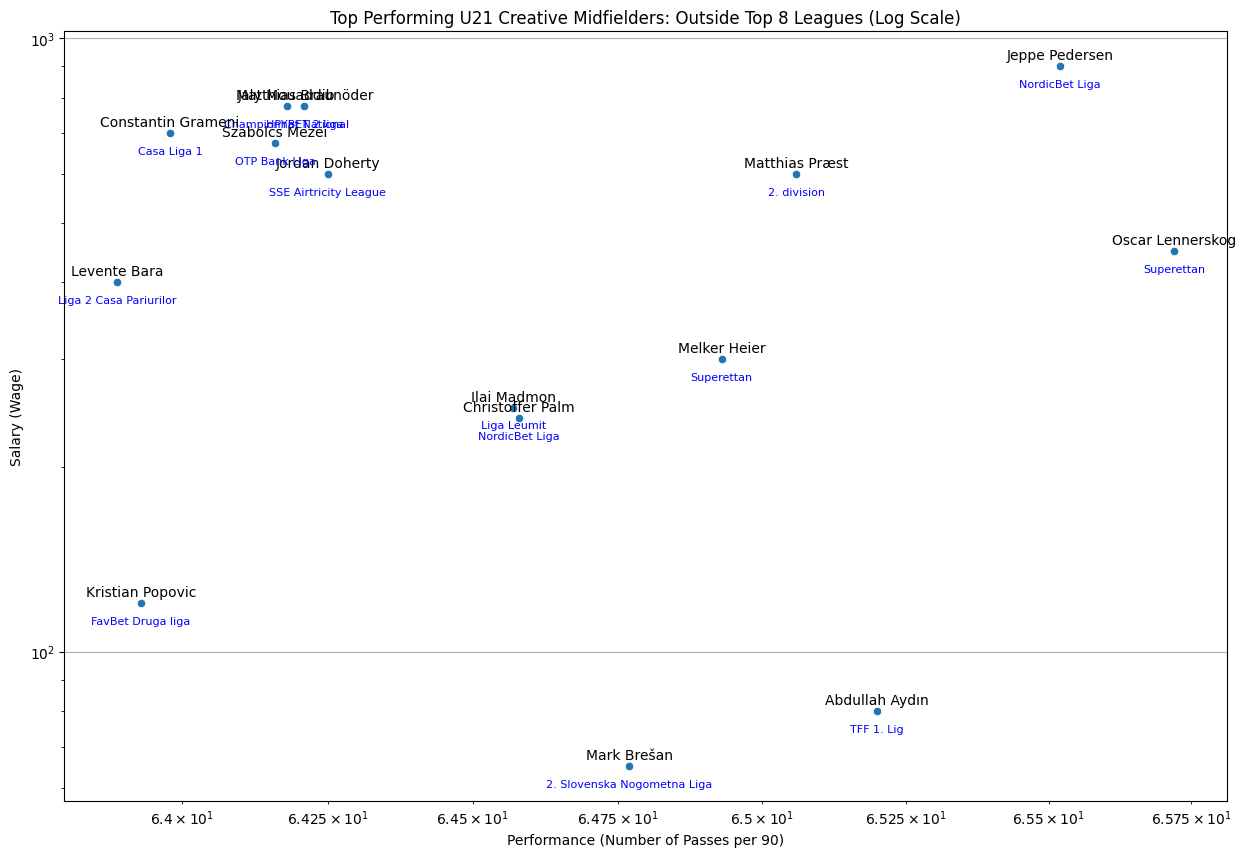

In [ ]:
# Calculate median wage by Division
median_wage_by_division = df.groupby('Division')['Wage'].median()

# Filter divisions with more than 10 players
divisions_with_more_than_10_players = df['Division'].value_counts()
divisions_with_more_than_10_players = divisions_with_more_than_10_players[divisions_with_more_than_10_players >= 10].index
median_wage_by_division = median_wage_by_division[median_wage_by_division.index.isin(divisions_with_more_than_10_players)]

# Remove NaN values
median_wage_by_division = median_wage_by_division.dropna()

# Select the top 8 leagues based on median wage
top_8_leagues = median_wage_by_division.sort_values(ascending=False).head(8).index.tolist()

# Filter players from top 8 leagues
players_top_8 = df[df['Division'].isin(top_8_leagues)]

# Filter players from leagues outside top 8
players_outside_top_8 = df[~df['Division'].isin(top_8_leagues)]

# Filter U21 players in both groups
u21_players_top_8 = players_top_8[(players_top_8['Age'] <= 21) & (players_top_8['Position'].str.contains('M'))]
u21_players_outside_top_8 = players_outside_top_8[(players_outside_top_8['Age'] <= 21) & (players_outside_top_8['Position'].str.contains('M'))]

# Further filter to include only players with significant pass counts and wage less than 10000
u21_players_top_8 = u21_players_top_8[u21_players_top_8['Passes Completed/90'] > 30]
u21_players_outside_top_8 = u21_players_outside_top_8[u21_players_outside_top_8['Passes Completed/90'] > 30]
u21_players_top_8 = u21_players_top_8[u21_players_top_8['Wage'] < 10000]
u21_players_outside_top_8 = u21_players_outside_top_8[u21_players_outside_top_8['Wage'] < 10000]

# Calculate performance metric for midfielders (number of passes)
u21_players_top_8['Performance'] = u21_players_top_8['Passes Completed/90']
u21_players_outside_top_8['Performance'] = u21_players_outside_top_8['Passes Completed/90']


# Select top 15 players based on performance
top_performers_top_8 = u21_players_top_8.nlargest(15, 'Performance')
top_performers_outside_top_8 = u21_players_outside_top_8.nlargest(15, 'Performance')

# Create scatter plot for Top 8 Leagues
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Performance', y='Wage', data=top_performers_top_8, palette='viridis')

# Annotate player names and league category
for i in range(len(top_performers_top_8)):
    player_name = top_performers_top_8.iloc[i]['Name']
    performance = top_performers_top_8.iloc[i]['Performance']
    wage = top_performers_top_8.iloc[i]['Wage']
    division = top_performers_top_8.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )    
    plt.annotate(
        division, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=8,
        color='blue'
    )

# Customize the plot
plt.title('Top Performing U21 Creative Midfielders: Top 8 Leagues')
plt.xlabel('Performance (Number of Passes per 90)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot for Outside Top 8 Leagues
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')

# Annotate player names and league category
for i in range(len(top_performers_outside_top_8)):
    player_name = top_performers_outside_top_8.iloc[i]['Name']
    performance = top_performers_outside_top_8.iloc[i]['Performance']
    wage = top_performers_outside_top_8.iloc[i]['Wage']
    division = top_performers_outside_top_8.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )
    plt.annotate(
        division, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=8,
        color='blue'
    )

# Customize the plot
plt.title('Top Performing U21 Creative Midfielders: Outside Top 8 Leagues')
plt.xlabel('Performance (Number of Passes per 90)')
plt.ylabel('Salary (Wage)')
plt.grid(True)

# Redo it by adding a logarithmic scale to both axes 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Performance', y='Wage', data=top_performers_outside_top_8, palette='viridis')
for i in range(len(top_performers_outside_top_8)):
    player_name = top_performers_outside_top_8.iloc[i]['Name']
    performance = top_performers_outside_top_8.iloc[i]['Performance']
    wage = top_performers_outside_top_8.iloc[i]['Wage']
    division = top_performers_outside_top_8.iloc[i]['Division']
    
    plt.annotate(
        player_name, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=10,
        color='black'
    )
    plt.annotate(
        division, 
        (performance, wage),
        textcoords="offset points",
        xytext=(0,-15), 
        ha='center',
        fontsize=8,
        color='blue'
    )
plt.xscale('log')
plt.yscale('log')
plt.title('Top Performing U21 Creative Midfielders: Outside Top 8 Leagues (Log Scale)')
plt.xlabel('Performance (Number of Passes per 90)')
plt.ylabel('Salary (Wage)')
plt.grid(True)